# **Trabalho Final PDM - Análise de Sentimentos**
#### **Disciplina: Computação Paralela**
#### **Professor: Sávio**

#### **Alunos:**
**- Gustavo Rodrigues Ribeiro / RA:202003570** \
**- Khalil Alves / RA: 202103745** \
**- Keven Lucas / RA: 202000181** \
**- Matheus Leonel / RA:  202109822** \
**- Salvador Ludovico / RA: 202204038**


# **Domínio do Negócio: E-commerce**
### Para este projeto, o domínio de negócio escolhido será o de e-commerce com foco na análise de sentimentos em avaliações de produtos. As avaliações são obtidas de um dataset público de avaliações de produtos eletrônicos, como o Amazon Product Reviews Dataset, que oferece avaliações reais em várias categorias de produtos.

### **Atenção!!**
**Segue abaixo o link para download do Dataset bruto (Electronics_5.json) utilizado no projeto:**

https://drive.google.com/uc?export=download&id=1kI0hoiWyGaJ2iy3f5RNhhJLP1Uzu_x_L

Realização do download automático do Dataset com gdown.

In [ ]:
pip install gdown

In [ ]:
!mkdir data
!gdown https://drive.google.com/uc?id=1kI0hoiWyGaJ2iy3f5RNhhJLP1Uzu_x_L -O data/Electronics_5.json

## Iniciando o PySpark

**OBS: Necessário caso utilize Google Coolab ou outra plataforma para criação de códigos em Jupyter Notebook, no entanto, se utilizar o JupyterLab em um Dataproc no Google Cloud Console, essa etapa pode desconsiderada.**

Esta célula de código instala o Spark no ambiente de execução Colab. Aqui está uma explicação passo a passo:

1. **`!apt-get install openjdk-11-jdk-headless -qq > /dev/null`**: este comando instala o OpenJDK 11 (versão headless, sem interface gráfica), que é um requisito para o Spark. O `-qq` suprime a saída e o `> /dev/null` redireciona a saída para o nada, tornando o processo mais silencioso.

2. **`!wget -q https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz`**: Este comando baixa o arquivo compactado do Spark 3.5.6 (construído para o Hadoop 3) do site oficial do Apache Spark. O `-q` suprime a saída de download.

3. **`!tar xf spark-3.5.6-bin-hadoop3.tgz`**: Este comando extrai o arquivo compactado baixado do Spark, criando um diretório chamado `spark-3.5.6-bin-hadoop3`.

4. **`!pip -q install findspark`**: Este comando instala a biblioteca `findspark` usando `pip`. Findspark é uma biblioteca Python que torna mais fácil configurar o Spark em um ambiente Python, principalmente no Colab. Ela define as variáveis de ambiente necessárias para que o Spark funcione corretamente.

Após executar essas linhas, você terá o Spark instalado e pronto para ser usado em seu notebook Colab.

## Conexão Via Unix/Colab/GCP

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
!tar xf spark-3.5.6-bin-hadoop3.tgz
!pip -q install findspark

Defina as variáveis de ambiente do Spark:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.6-bin-hadoop3"

O código a seguir garante que o Spark seja configurado corretamente e esteja pronto para uso em seu ambiente Python.

* **`findspark.init()`**: executa a função `init()` do módulo `findspark`. Esta função:
    * Localiza a instalação do Spark em seu sistema.
    * Configura as variáveis de ambiente necessárias para que o Python possa interagir com o Spark. Isso permite que o driver Python (seu código Python) se comunique com o executor Spark (o código que realmente processa os dados).


In [ ]:
import findspark
findspark.init()

Depois de executar a célula anterior, você poderá importar e usar as bibliotecas Spark como `pyspark.sql.SparkSession` para criar uma sessão Spark e começar a trabalhar com dados.

## Conexão Via Windows

In [ ]:
import os
import requests
import tarfile
import sys

# --- 1. Baixar o Spark (substitui o wget) ---
spark_version = "3.5.6"  # Usando uma versão estável e popular
hadoop_version = "3"
spark_url = f"https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz"
spark_filename = os.path.basename(spark_url)
spark_foldername = spark_filename.replace(".tgz", "")

print(f"Baixando {spark_filename}...")
# Faz o download apenas se o arquivo não existir
if not os.path.exists(spark_filename):
    response = requests.get(spark_url, stream=True)
    if response.status_code == 200:
        with open(spark_filename, "wb") as f:
            f.write(response.raw.read())
        print("Download completo.")
    else:
        print(f"Erro ao baixar o arquivo. Status: {response.status_code}")
else:
    print("Arquivo Spark já existe, pulando download.")

# --- 2. Extrair o Spark (substitui o tar) ---
print(f"Extraindo {spark_filename}...")
# Extrai apenas se a pasta de destino não existir
if not os.path.exists(spark_foldername):
    with tarfile.open(spark_filename, "r:gz") as tar:
        tar.extractall()
    print("Extração completa.")
else:
    print("Pasta do Spark já existe, pulando extração.")

!pip -q install findspark

print("\nConfiguração inicial concluída!")

Baixando spark-3.5.6-bin-hadoop3.tgz...
Arquivo Spark já existe, pulando download.
Extraindo spark-3.5.6-bin-hadoop3.tgz...
Pasta do Spark já existe, pulando extração.

Configuração inicial concluída!


In [ ]:
import os
import findspark

# --- Configurar as Variáveis de Ambiente para o Python ---

# Caminho para a pasta do Spark que foi extraída
# Use os.path.abspath para garantir um caminho absoluto e compatível com Windows
spark_home = os.path.abspath("spark-3.5.6-bin-hadoop3")

# ATENÇÃO: Verifique se este caminho do JAVA_HOME está correto para a sua máquina!
# Deve ser o mesmo que você configurou nas variáveis de ambiente do Windows.
java_home = r"C:\Program Files\Java\zulu21.34.19-ca-jdk21.0.3-win_x64"
hadoop_home = r"C:\hadoop-3.3.6"

print(f"SPARK_HOME: {spark_home}")
print(f"JAVA_HOME: {java_home}")
print(f"HADOOP_HOME: {hadoop_home}")

# Define as variáveis de ambiente para a sessão atual
os.environ["SPARK_HOME"] = spark_home
os.environ["JAVA_HOME"] = java_home
os.environ["HADOOP_HOME"] = hadoop_home

# Adiciona os binários do Spark e Hadoop ao PATH do sistema
os.environ["PATH"] = f"{os.environ['SPARK_HOME']}\\bin;{os.environ['HADOOP_HOME']}\\bin;{os.environ['PATH']}"

# --- Inicializar o findspark ---
findspark.init()

SPARK_HOME: c:\Users\gusta\Desktop\TrabalhoFinalCP\spark-3.5.6-bin-hadoop3
JAVA_HOME: C:\Program Files\Java\zulu21.34.19-ca-jdk21.0.3-win_x64
HADOOP_HOME: C:\hadoop-3.3.6


## Conectando ao Drive

Aqui estaremos sincronizando nossa conta no Drive ao ambiente Colab, para que os arquivos em nuvem sejam gerenciados (lidos e escritos) e manipulados diretamente no Drive.

**OBS: Caso esteja utilizando o Dataproc do Google Cloud Console, com o ambiente virtual Jupyter Notebook, você podera utilizar o Data Lake Google Cloud Storage (GCS) que está conectado a sua conta, não necessitando desse processo de sincronização com o Drive.**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive

MyDrive  Shareddrives


## Importações e Função Para Criação da Sessão Spark

In [ ]:
!pip install matplotlib seaborn

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

Função para criação da sessão

In [ ]:
# Função para criar uma sessão Spark com um número específico de cores
def get_spark_session(cores):
    """Cria uma sessão Spark em modo local com um número definido de cores."""
    return SparkSession.builder \
        .appName(f"BronzeLayerAnalysis_Cores_{cores}") \
        .master(f"local[{cores}]") \
        .config("spark.driver.memory", "32g") \
        .getOrCreate()

## **Arquitetura Medallion: BRONZE - Coleta e Ingestão de Dados**

Função da Tarefa a ser Medida (Processamento da Camada Bronze)

In [ ]:
def run_bronze_layer_task(spark, input_path, output_path):
    """
    Lê um arquivo JSON grande, aplica um schema e escreve em formato Parquet.
    Esta função representa o trabalho da Camada Bronze.
    """
    print(f"Lendo dados de: {input_path}")

    # Schema definido pelo usuário
    df_schema = StructType([
        StructField("image", ArrayType(StringType()), True),
        StructField("overall", FloatType(), True),
        StructField("vote", StringType(), True),
        StructField("verified", BooleanType(), True),
        StructField("reviewTime", StringType(), True),
        StructField("reviewerID", StringType(), True),
        StructField("asin", StringType(), True),
        StructField("style", MapType(StringType(), StringType()), True),
        StructField("reviewerName", StringType(), True),
        StructField("reviewText", StringType(), True),
        StructField("summary", StringType(), True),
        StructField("unixReviewTime", LongType(), True)
    ])

    # Leitura do JSON
    reviews_df_bronze = spark.read.schema(df_schema).json(input_path)

    print(f"Escrevendo dados em Parquet para: {output_path}")

    # Escrita do arquivo resultante em Parquet
    reviews_df_bronze.write.mode("overwrite").option("header", True).parquet(output_path)

    print("Tarefa da Camada Bronze concluída.")

Definindo Caminhos

In [ ]:
# Defina os caminhos para seus dados
dataset_path = r"C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Electronics_5.json"
bronze_output_path = r"C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Bronze\reviews_bronze"

## Avaliações

In [ ]:
# Lista de número de cores para testar. O '1' representa o modo sequencial.
core_counts = [1, 2, 4, 6]  # Ajuste conforme os cores da sua máquina
results = []

print("Iniciando experimento de desempenho da Camada Bronze...")

for cores in core_counts:
    print(f"\n---------- EXECUTANDO COM {cores} CORE(S) ----------")

    # Inicia uma sessão Spark nova e limpa para cada teste
    spark = get_spark_session(cores)

    start_time = time.time()

    # Executa a tarefa da camada Bronze
    run_bronze_layer_task(spark, dataset_path, bronze_output_path)

    end_time = time.time()
    execution_time = end_time - start_time

    # Armazena os resultados
    results.append({
        "num_cores": cores,
        "execution_time": execution_time
    })

    print(f"Tempo de execução: {execution_time:.2f} segundos")

    # Para a sessão para liberar recursos
    spark.stop()

Iniciando experimento de desempenho da Camada Bronze...

---------- EXECUTANDO COM 1 CORE(S) ----------
Lendo dados de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Electronics_5.json
Escrevendo dados em Parquet para: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Bronze\reviews_bronze
Tarefa da Camada Bronze concluída.
Tempo de execução: 61.80 segundos

---------- EXECUTANDO COM 2 CORE(S) ----------
Lendo dados de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Electronics_5.json
Escrevendo dados em Parquet para: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Bronze\reviews_bronze
Tarefa da Camada Bronze concluída.
Tempo de execução: 27.47 segundos

---------- EXECUTANDO COM 4 CORE(S) ----------
Lendo dados de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Electronics_5.json
Escrevendo dados em Parquet para: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Bronze\reviews_bronze
Tarefa da Camada Bronze concluída.
Tempo de execução: 15.77 segundos

---------- EXECUTANDO COM 6 CORE(S) ----------
Lendo da

## Análise e Visualização dos Resultados



#### Análise Final de Desempenho da Camada Bronze ####


--- Tabela de Resultados ---

                 cores  execution_time  speedup  efficiency
0  Sequencial (1 Core)           61.80     1.00        1.00
1   Paralelo (2 Cores)           27.47     2.25        1.12
2   Paralelo (4 Cores)           15.77     3.92        0.98
3   Paralelo (6 Cores)           13.27     4.66        0.78



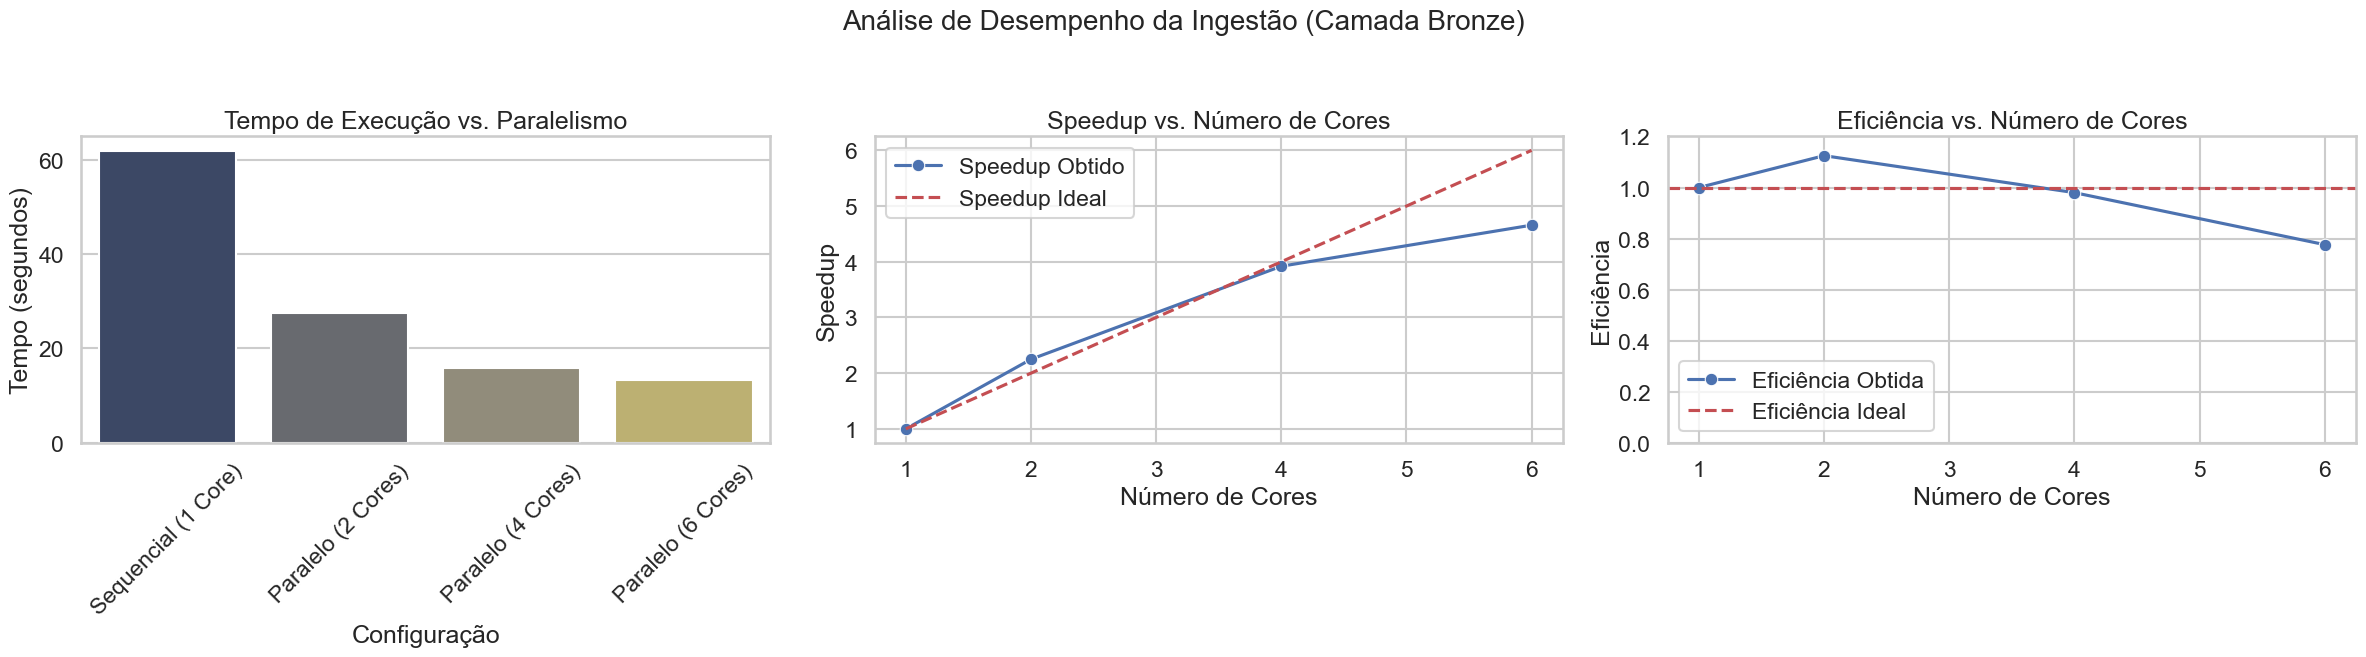

In [ ]:
from re import X
print("\n\n#### Análise Final de Desempenho da Camada Bronze ####\n\n")

results_df = pd.DataFrame(results)
results_df['cores'] = results_df['num_cores'].apply(lambda x: 'Sequencial (1 Core)' if x == 1 else f'Paralelo ({x} Cores)')

sequential_time = results_df.loc[results_df['num_cores'] == 1, 'execution_time'].iloc[0]
results_df['speedup'] = sequential_time / results_df['execution_time']
results_df['efficiency'] = results_df['speedup'] / results_df['num_cores']

print("--- Tabela de Resultados ---\n")
print(results_df[['cores', 'execution_time', 'speedup', 'efficiency']].round(2))
print()

sns.set_theme(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('Análise de Desempenho da Ingestão (Camada Bronze)', fontsize=20)

sns.barplot(ax=axes[0], x='cores', y='execution_time', data=results_df, palette='cividis', hue='cores', legend=False)
axes[0].set_title('Tempo de Execução vs. Paralelismo')
axes[0].set_xlabel('Configuração')
axes[0].set_ylabel('Tempo (segundos)')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1], x='num_cores', y='speedup', data=results_df, marker='o', label='Speedup Obtido')
axes[1].plot(results_df['num_cores'], results_df['num_cores'], linestyle='--', color='r', label='Speedup Ideal')
axes[1].set_title('Speedup vs. Número de Cores')
axes[1].set_xlabel('Número de Cores')
axes[1].set_ylabel('Speedup')
axes[1].legend()
axes[1].grid(True)

sns.lineplot(ax=axes[2], x='num_cores', y='efficiency', data=results_df, marker='o', label='Eficiência Obtida')
axes[2].axhline(y=1.0, linestyle='--', color='r', label='Eficiência Ideal')
axes[2].set_title('Eficiência vs. Número de Cores')
axes[2].set_xlabel('Número de Cores')
axes[2].set_ylabel('Eficiência')
axes[2].set_ylim(0, 1.2)
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análise

A paralelização da ingestão de dados mostrou um speedup moderado. Sendo uma tarefa I/O-bound, os ganhos são limitados pela velocidade do disco. No entanto, a capacidade do Spark de ler e escrever os arquivos de partição do Parquet em paralelo resulta em uma redução de tempo significativa.

A Lei de Amdahl ajuda a explicar o comportamento observado: mesmo com aumento de núcleos, o ganho de desempenho é limitado pela fração do código que não pode ser paralelizada, como a espera por I/O. Essa porção serial do processo impõe um teto ao speedup teórico máximo. Assim, mesmo com 6 núcleos, o ganho não cresce linearmente e a eficiência tende a diminuir conforme o número de núcleos aumenta — como evidenciado nos gráficos.